In [1]:
import numpy as np

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

import sys
sys.path.append("..")

from src.datasets import Dataset
from src.metrics import class_purity, node_statistics
from src.LT_models import LTRegressor
from src.optimization import evaluate

In [2]:
LOAD_DIR = "../results/tabular/YEAR/depth=3/reg=561.7353202746074/mlp-layers=3/dropout=0.07600075080048799/seed=1225/"

additional_load = {'checkpoint': None}
model = LTRegressor.load_model(LOAD_DIR, additional_load)
checkpoint = additional_load['checkpoint']

In [3]:
DATA_NAME = checkpoint['dataset']
SEED = checkpoint['seed']

data = Dataset(DATA_NAME, data_path="../DATA/", seed=459107, normalize=True)

X, Y = data.X_valid, data.y_valid
true_y = Y

Normalize dataset


In [4]:
MAX_DEPTH = 3
leaves = range(2**MAX_DEPTH - 1, 2**(MAX_DEPTH+1) - 1)

stats = node_statistics(X, Y, model, MAX_DEPTH)
*_, stds, y_distrs, zs = stats

In [5]:
# build graph for visualization
G = nx.from_numpy_array(model.latent_tree.bst.to_adj_matrix(MAX_DEPTH))
pos = graphviz_layout(G, prog='dot')

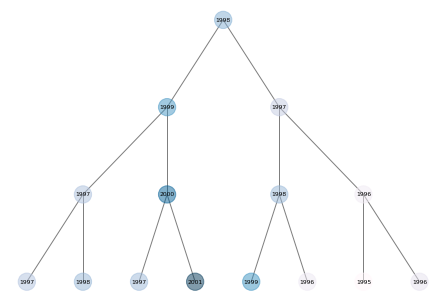

In [6]:
nx.draw(G, pos, arrows=True, node_color=[np.mean(d) for d in y_distrs], cmap=plt.cm.PuBu, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, labels={i: int(np.mean(d)) for i, d in enumerate(y_distrs)})

plt.savefig(f'{LOAD_DIR}y-mean-{MAX_DEPTH}.pdf', bbox_inches='tight', transparent=False)

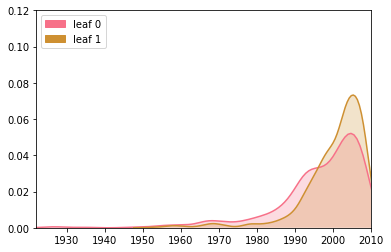

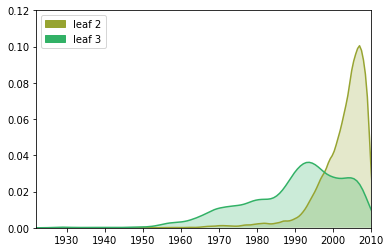

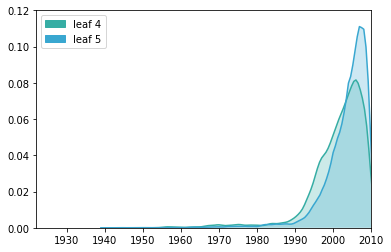

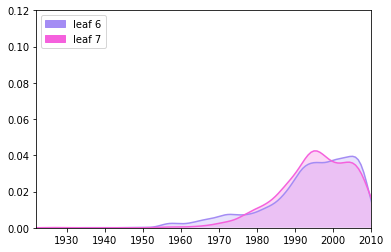

In [45]:
pal = sns.color_palette("husl", len(leaves))

for t in range(3, 7):

    empty = True
    labels = []
    for l in leaves:

        if len(y_distrs[l]) > 1 and model.latent_tree.bst.is_ancestor(t, l):

            empty = False
            plt.figure(t)

            sns.kdeplot(y_distrs[l], color=pal[l - 2**MAX_DEPTH + 1], shade=True, shade_lowest=False, legend=True)
            label_patch = mpatches.Patch(color=pal[l - 2**MAX_DEPTH + 1], label=f"leaf {l   - 2**MAX_DEPTH + 1}")
            labels.append(label_patch)
            
    if not empty:
        
        plt.xlim(np.min(Y), np.max(Y))
        plt.ylim(0, 0.12)
        plt.legend(handles=labels, loc='upper left')
        plt.savefig(f'{LOAD_DIR}y-distr-{t}-{MAX_DEPTH}.pdf', bbox_inches='tight', transparent=False)


In [5]:
MAX_DEPTH = 3
leaves = range(2**MAX_DEPTH - 1, 2**(MAX_DEPTH+1) - 1)

stats = node_statistics(X, Y, model, MAX_DEPTH)
stds, y_distrs, zs = stats

In [6]:
# build graph for visualization
G = nx.from_numpy_array(model.latent_tree.bst.to_adj_matrix(MAX_DEPTH))
pos = graphviz_layout(G, prog='dot')

In [8]:
from scipy.stats import gaussian_kde

kernels = [gaussian_kde(y_distrs[l]) for l in leaves]
weights = [len(y_distrs[l]) / len(Y) for l in leaves]

In [9]:
intervals = np.arange(np.min(Y), np.max(Y), 1)
kdes = [k(intervals) for k in kernels]

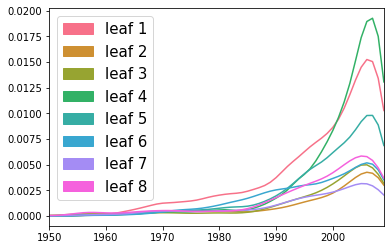

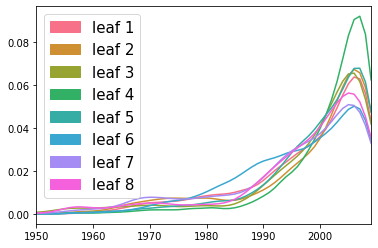

In [11]:
pal = sns.color_palette("husl", len(leaves))

for t in [0]:

    empty = True
    labels = []
    for l in leaves:

        if len(y_distrs[l]) > 1 and model.latent_tree.bst.is_ancestor(t, l):

            empty = False
            plt.figure(t)
            
            sns.lineplot(intervals, kdes[l - 2**MAX_DEPTH + 1] * weights[l - 2**MAX_DEPTH + 1], color=pal[l - 2**MAX_DEPTH + 1])
#             sns.distplot(y_distrs[l], color=pal[l - 2**MAX_DEPTH - 1], kde=False, hist=True, norm_hist=False)
            label_patch = mpatches.Patch(color=pal[l - 2**MAX_DEPTH + 1], label=f"leaf {l  - 2**MAX_DEPTH + 2}")
            labels.append(label_patch)
            
    if not empty:
        
        plt.xlim(np.min(Y), np.max(Y) - 1)
#         plt.ylim(0, 0.12)
        plt.legend(handles=labels, loc='upper left', fontsize=15)
        plt.savefig(f'y-unnormed-{t}-{MAX_DEPTH}.pdf', bbox_inches='tight', transparent=False)

for t in [0]:

    empty = True
    labels = []
    for l in leaves:

        if len(y_distrs[l]) > 1 and model.latent_tree.bst.is_ancestor(t, l):

            empty = False
            plt.figure(t+10)
            
            sns.lineplot(intervals, kdes[l - 2**MAX_DEPTH + 1], color=pal[l - 2**MAX_DEPTH + 1])
#             sns.distplot(y_distrs[l], color=pal[l - 2**MAX_DEPTH - 1], kde=False, hist=True, norm_hist=False)
            label_patch = mpatches.Patch(color=pal[l - 2**MAX_DEPTH + 1], label=f"leaf {l  - 2**MAX_DEPTH + 2}")
            labels.append(label_patch)
            
    if not empty:
        
        plt.xlim(np.min(Y), np.max(Y) - 1)
#         plt.ylim(0, 0.12)
        plt.legend(handles=labels, loc='upper left', fontsize=15)
        plt.savefig(f'y-normed-{t}-{MAX_DEPTH}.pdf', bbox_inches='tight', transparent=False)
